In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import mstats
from IPython.display import display, HTML
from statsmodels.stats import weightstats

# Author

## Yana Neykova

# Abstract

In this project I will focus on a dataset "Health nutrition and population statistics". The dataset is available in "data" folder, but is also available online at Kaggle( for the exact link please refer to the Resources section). 

<br> The structure of the project is as it follows:
<br> 1. Abstract
<br> 2. Correlation analysis
<br> 3. EDA 
<br> 4. Hypothesis testing
<br> 5. Conclusion
<br> 6. Further development
<br> 7. Resources

<br><br> I will start with reading and cleaning the dataset. Then I will check on the correLation coefficient and perform some EDA. Eventually, I will perform a hypothesis testing to define if there is strong connection between the data from 20th century and 21st century. Please note that for faster performing I will clean the dataset and reduce it. 


As usual, I will check the shape, dtypes, and check for some unique values of the data.

In [6]:
health_data = pd.read_csv('data/health_nutrition_and_population.csv')

In [7]:
health_data.shape

(89010, 61)

In [8]:
health_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
health_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Unnamed: 60'], dtype=object)

I will check on the unique values of the countries, and the indicator name columns. I will group the dataset 

In [11]:
countries = health_data["Country Name"].unique()

In [12]:
len(countries)

258

In [13]:
indicator_name = health_data["Indicator Name"].unique()
indicator_name

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

In [14]:
len(indicator_name)

345

I notice something interesting here - there are 258 unique countries, each of which present in the dataset 345 times. The Indicator names column is exactly the opposite - there are 345 unique values, each of which presents in the dataset 258 times. 

Once I have reviewed the dataset, I will call the describe function also. 

In [15]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
Country Name      89010 non-null object
Country Code      89010 non-null object
Indicator Name    89010 non-null object
Indicator Code    89010 non-null object
1960              35482 non-null float64
1961              35325 non-null float64
1962              35889 non-null float64
1963              35452 non-null float64
1964              35483 non-null float64
1965              35603 non-null float64
1966              35538 non-null float64
1967              36022 non-null float64
1968              35577 non-null float64
1969              35630 non-null float64
1970              36910 non-null float64
1971              37578 non-null float64
1972              38015 non-null float64
1973              37542 non-null float64
1974              37574 non-null float64
1975              37760 non-null float64
1976              37778 non-null float64
1977              38204 non-null f

In [16]:
display(health_data.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,89010,258,Azerbaijan,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,89010,258,BTN,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Name,89010,345,"Health expenditure, total (current US$)",258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Code,89010,345,SP.POP.AG25.FE.IN,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,35482,NaN,NaN,NaN,4.39886e+06,4.94824e+07,-2.37402,19.0798,5282,99935.2,3.03506e+09
1961,35325,NaN,NaN,NaN,4.47733e+06,5.01321e+07,-2.49882,21.3,5794,103400,3.07612e+09
1962,35889,NaN,NaN,NaN,4.48328e+06,5.05447e+07,-3.82665e+06,17.9,5158,102584,3.12906e+09
1963,35452,NaN,NaN,NaN,4.63488e+06,5.19212e+07,-3.20668,22.282,5945,107849,3.19395e+09
1964,35483,NaN,NaN,NaN,4.72781e+06,5.29785e+07,-3.07861,22.3688,6065,110750,3.25935e+09
1965,35603,NaN,NaN,NaN,4.81056e+06,5.40199e+07,-2.97853,20.1336,5998,112576,3.32605e+09


Dataset is quite long ( it contains information for 55 years - 1960 to 2015 including). Thus, I will choose to focus to compare the values from less years - with step of 11 years, and try to find some trend. Lets clean the dataset accordingly by dropping the not needed informaiton. I will show the column values from the cleaned data, as well as the types of the columns. I could also save the new file as .csv, but I don't need it so I will skip this step.

In [17]:
health_data= health_data.drop(['1961', '1962', '1963', '1964','1965', '1966', '1967',
       '1968', '1969','1970', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989','1990','1991', '1991',
       '1992',  '1994', '1995', '1996', '1997', '1998', '1999','2000',
       '2001', '2002', '2003',  '2005', '2006', '2007',
       '2008', '2009', '2010','2011', '2012', '2013', '2014', 'Unnamed: 60'], axis=1)

In [18]:
health_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1971', '1982', '1993', '2004', '2015'], dtype=object)

In [19]:
health_data.shape

(89010, 10)

In [20]:
health_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1971              float64
1982              float64
1993              float64
2004              float64
2015              float64
dtype: object

We can see that the dataset is significantly reduced now. This gives me the opportunity to focus on specific part of it, and to have better performance.

I didn't clean the dataset from NaN values on purpose. This leads to loss of information, which leads to different results in the end. Thus I will clean the data at later stage ( plus this is quite good way to have the oppotunity to change, instead drop the NaN values if needed.)

# Correlation coefficient

Data is already cleaned. Lets theck on the correlation coefficient now. 

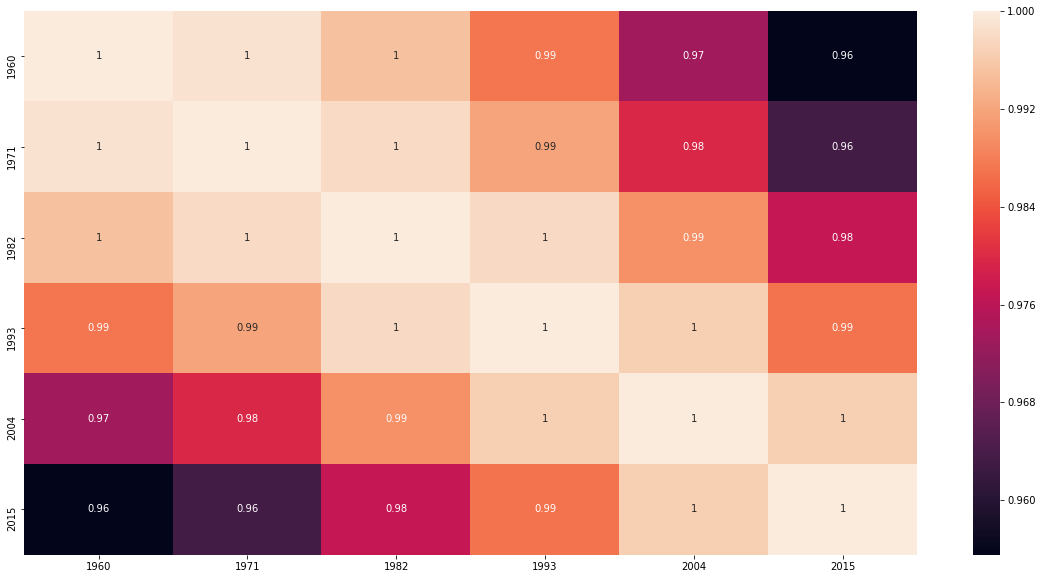

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(health_data.corr(), annot = True)
plt.show()

We see that the correlation is quite strong at all cells  ( the lowest one is 0.96). This actually leads me to the conclusion, that this correlation matrix does not give me actually that much of information. 

I will try to plot some scatterplots to check the relation between few years.

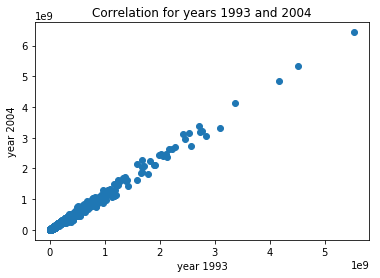

In [23]:
plt.scatter(health_data['1993'], health_data['2004'])
plt.xlabel('year 1993')
plt.ylabel('year 2004')
plt.title('Correlation for years 1993 and 2004')
plt.show()

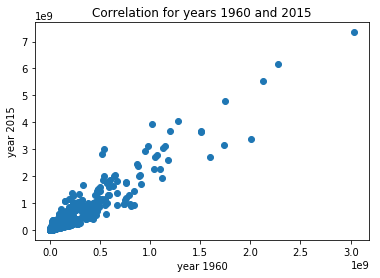

In [24]:
plt.scatter(health_data['1960'], health_data['2015'])
plt.xlabel('year 1960')
plt.ylabel('year 2015')
plt.title('Correlation for years 1960 and 2015')
plt.show()

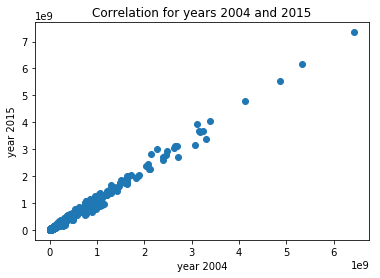

In [25]:
plt.scatter(health_data['2004'], health_data['2015'])
plt.xlabel('year 2004')
plt.ylabel('year 2015')
plt.title('Correlation for years 2004 and 2015')
plt.show()

As expected, all 3 graphics above visualize the same result - a strong trend exists. Lets make a comparison  of the data from one year and countries.


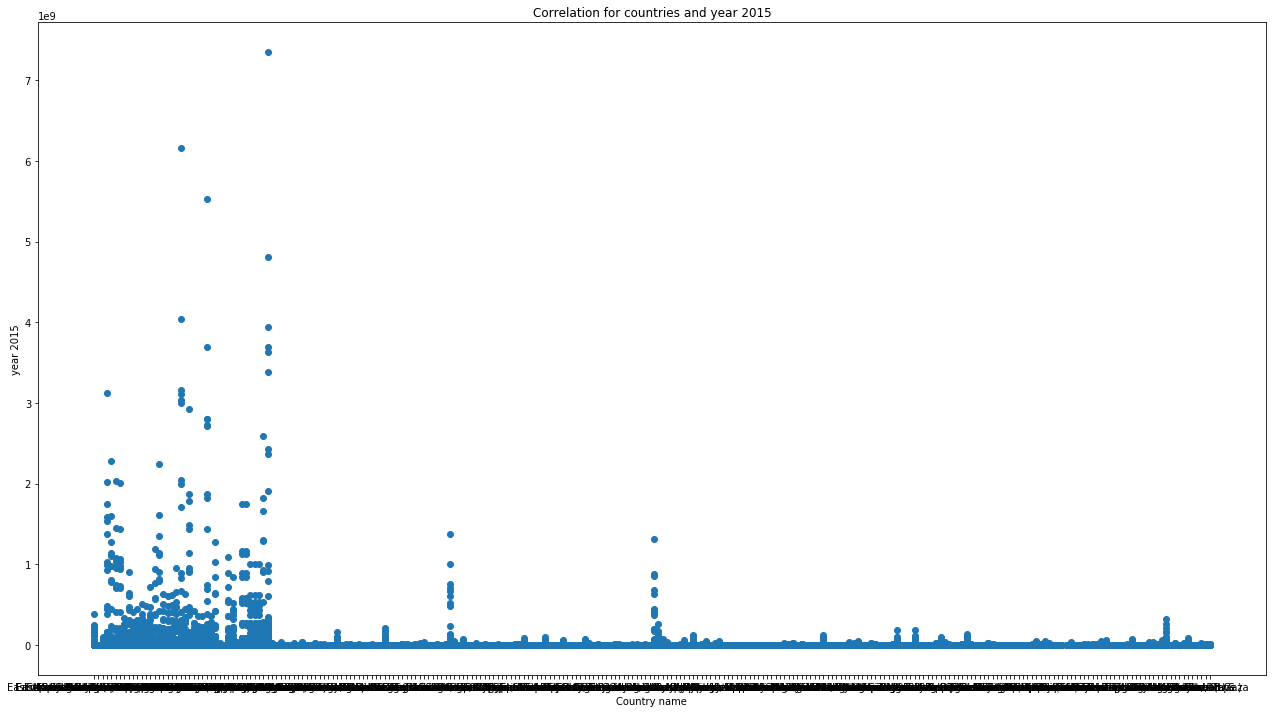

In [26]:
plt.figure(figsize=[22,12])
plt.scatter(health_data['Country Name'], health_data['2015'])
plt.xlabel('Country name')
plt.ylabel('year 2015')
plt.title('Correlation for countries and year 2015')
plt.show()

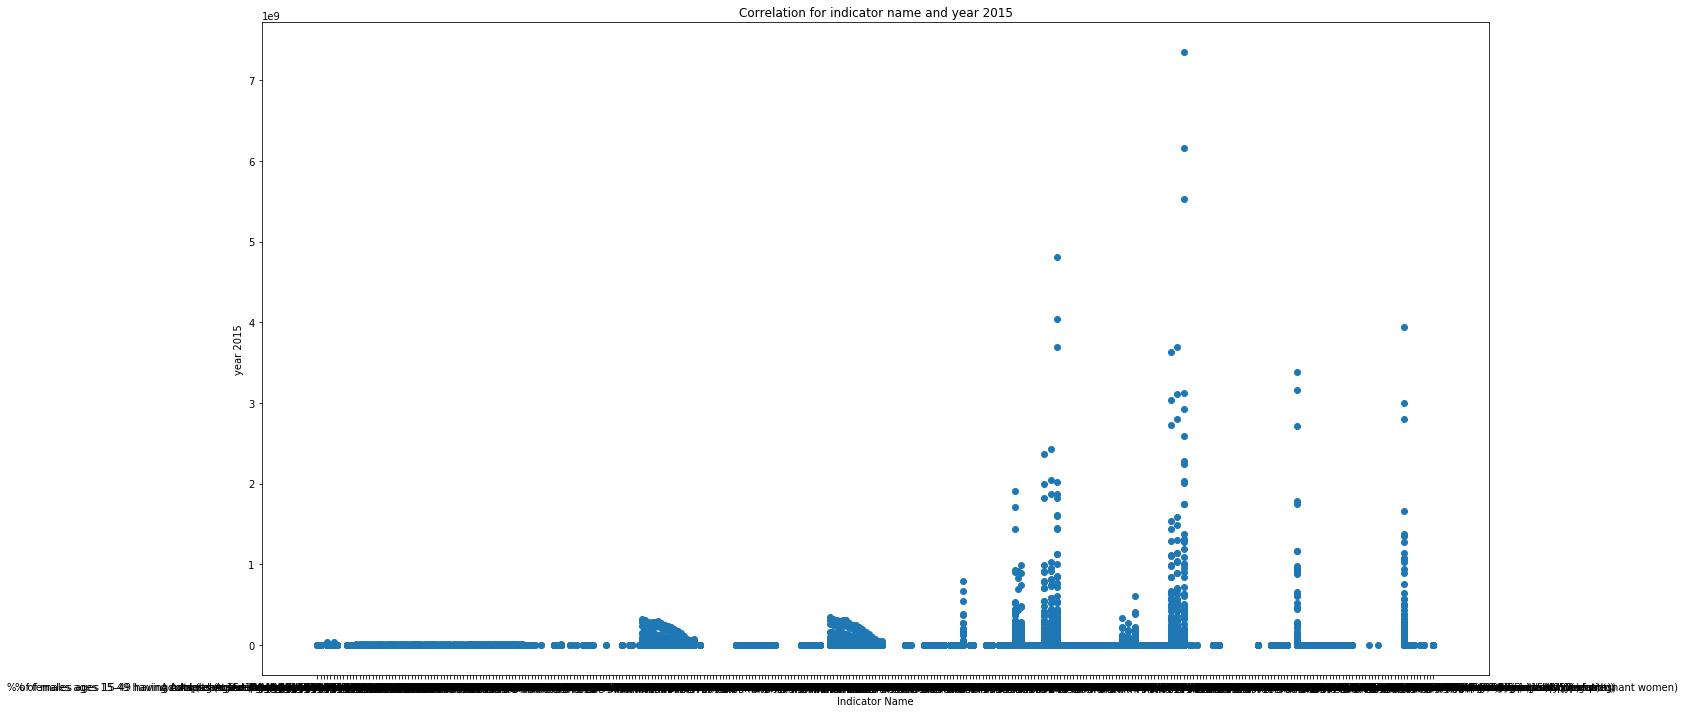

In [27]:
plt.figure(figsize=[22,12])
plt.scatter(health_data['Indicator Name'], health_data['2015'])
plt.xlabel('Indicator Name')
plt.ylabel('year 2015')
plt.title('Correlation for indicator name and year 2015')
plt.show()

I conclude that the correlation between the latest year, and the countries/indicator data is not that well defined and strong. We have some outliers,which are well visible on both graphics. For better analysis  here I need to define a smaller sample size - focus on particular countries , check the trend and analyze on the root reasons.

The countries names and indicator names are not visualized well at all on the graphic. This can be improved in the further development -  by grouping the countries to continents , for example.

# EDA analysis

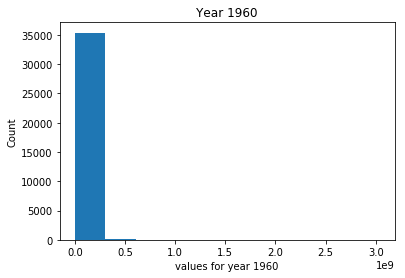

In [30]:
plt.hist(health_data['1960'].dropna())
plt.title('Year 1960')
plt.xlabel('values for year 1960')
plt.ylabel('Count')
plt.show()

In [31]:
health_data['1960'].skew()

26.575971616592753

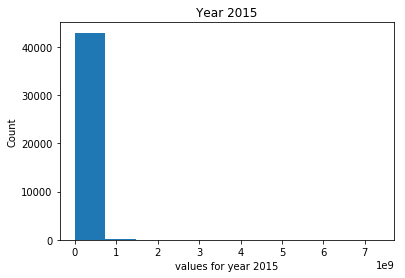

In [32]:
plt.hist(health_data['2015'].dropna())
plt.title('Year 2015')
plt.xlabel('values for year 2015')
plt.ylabel('Count')
plt.show()

In [33]:
health_data['2015'].skew()

29.713906957979734

The distribution is definetely not normal. We have very big assymetry . Skewness number is also quite big. BAsed ont the visualizations above, we have very strong positive skewnness.  

Now, I will divide the data into 2 groups - one, containing the years from 20th century, and a second one, containing the years from 21st century. I will need them as in the following section I will use the groups to perform a test.

In [34]:
group_21century = health_data.drop(['1960','1971','1982','1993'],axis=1)

In [35]:
group_20century  = health_data.drop(['2004','2015'], axis=1)

In [36]:
group_20century

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1971,1982,1993
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,122.133431,9.179119e+01,6.494897e+01
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN
5,Arab World,ARB,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN
6,Arab World,ARB,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Age at first marriage, female",SP.DYN.SMAM.FE,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Age at first marriage, male",SP.DYN.SMAM.MA,NaN,NaN,NaN,NaN
9,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,87.799235,93.922800,9.111672e+01,8.514520e+01


In [37]:
group_21century

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2015
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,5.110325e+01,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN
5,Arab World,ARB,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN
6,Arab World,ARB,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,NaN,NaN
7,Arab World,ARB,"Age at first marriage, female",SP.DYN.SMAM.FE,NaN,NaN
8,Arab World,ARB,"Age at first marriage, male",SP.DYN.SMAM.MA,NaN,NaN
9,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,6.836710e+01,6.175419e+01


Now I will clean a little bit the two groups and drop the NA values. I do not need to replace them.

In [38]:
group_20century = group_20century.dropna()

In [39]:
group_20century.shape

(35124, 8)

In [40]:
group_21century = group_21century.dropna()

In [41]:
group_21century.shape

(40308, 6)

# Hypothesis testing

In this section I will perform a Ztest. 
The two hypothesis are as it follows: 
    <br> H0: There is no significant difference between two groups.
    <br> H1: There is significant difference between the two groups.
    
I will directly use the two groups created in the previous section, and take the "border " years - 1960 and 2015.    

In [43]:
z, p = weightstats.ztest(group_20century['1960'].astype(float).dropna(),group_21century['2015'].astype(float))

In [44]:
z, p

(-7.988380346424469, 1.3672307712249923e-15)

The p-value is grater then our default value of 0.05 so we conclude that the H0 hypothesis is the correct one. The result would be different if we focus on other years, as data there would vary.

# Conclusion

For the purposes of this project I read and cleaned the dataset, and explored it by looking for a correlation coefficient, skewness and some graphics. 

Eventually I ended up with creating 2 groups - for years on 20th century, and for the ones from 21st century. After performing a Ztest, it turned out that H0 hypothesis is correct - there is no significant difference between the two gorups.

# Further development 

In case of further development and more time available, I would perform the whole process from other perspective. I would group the data by countries , compare the results and eventually group them by continents. Then I would find another dataset and link both to find the most/least common deseases, for example. 

# Resources:

<br> 1. Dataset source - https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics/kernels
<br> 2. Correlation coefficient - https://www.investopedia.com/terms/c/correlationcoefficient.asp
<br> 3. Z test definition - https://www.investopedia.com/terms/z/z-test.asp